In [342]:
import seaborn as sns
from adaptive_CI.compute import collect
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
from time import time
from glob import glob
import scipy.stats as stats
from IPython.display import display, HTML
from adaptive_CI.saving import *
import  pickle
from pickle import UnpicklingError
import copy
from itertools import compress
import scipy.stats as stats
from plot_utils import *

sns.set_context("notebook", font_scale=1.3)
%matplotlib inline
%reload_ext autoreload
%autoreload 2

### Load data

In [343]:
df_stats, df_sampleQuotas, df_contrasts = [], [], []
for name in [ 'nosignal_uniform', 'lowSNR_uniform', 'highSNR_uniform']:
    df_stat, df_sampleQuota, df_contrast = generate_dataframes(name, redo=True)
    df_stats.append(df_stat)
    #df_sampleQuotas.append(df_sampleQuota)
    df_contrasts.append(df_contrast)
    
df_stats = pd.concat(df_stats)
#df_sampleQuotas = pd.concat(df_sampleQuotas)
df_contrasts = pd.concat(df_contrasts)
#print(df_stats.shape, df_sampleQuotas.shape, df_contrasts.shape)

Found 257 files.
0 corrupted files in total, have been removed.
Found 252 files.
0 corrupted files in total, have been removed.
Found 282 files.
0 corrupted files in total, have been removed.


### Converged stats comparison when T=20000

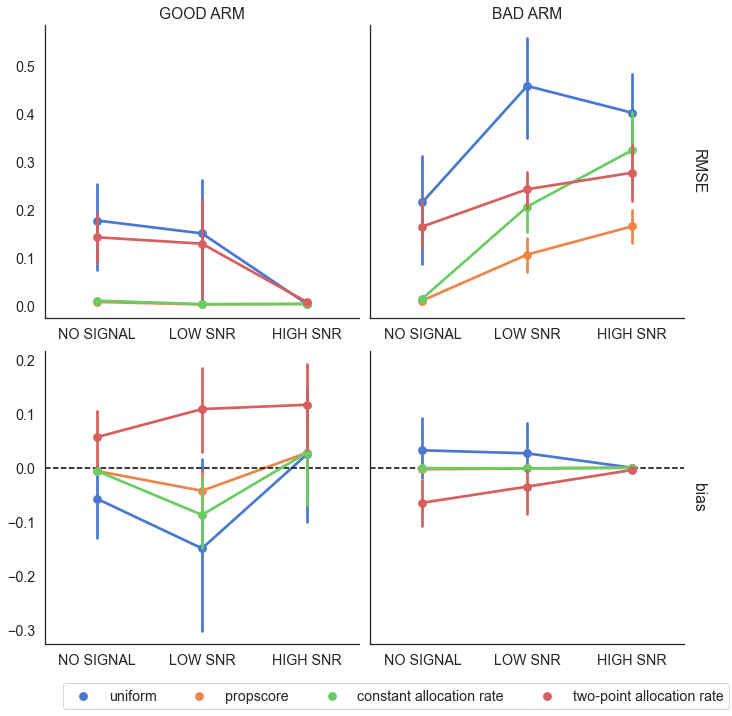

In [335]:
plot_converged_statistics(df_stats.query(f"T==20000 & noise_func=='uniform'"), name=None)

## Normality of normalized error

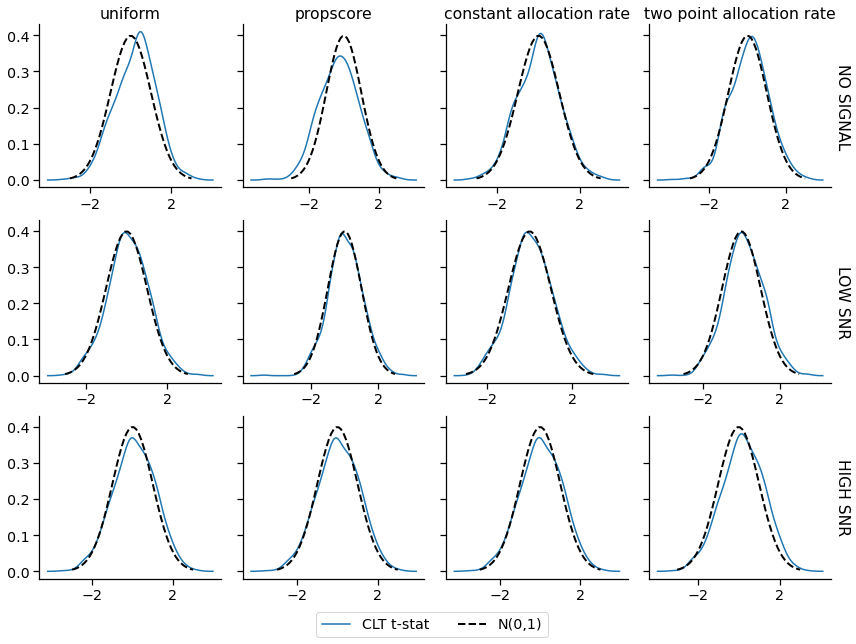

In [38]:

plot_hist(df_stats.query('policy==0 & T==20000'), noise_func='uniform',name='good_20000_hist')

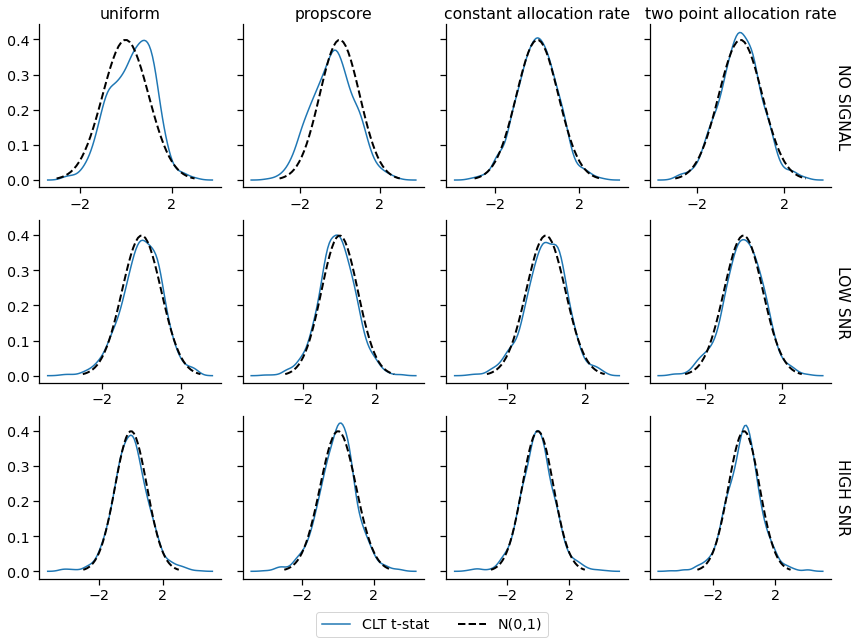

In [39]:
 plot_hist(df_stats.query('policy==2 & T==20000'), noise_func='uniform' , name='bad_20000_hist')

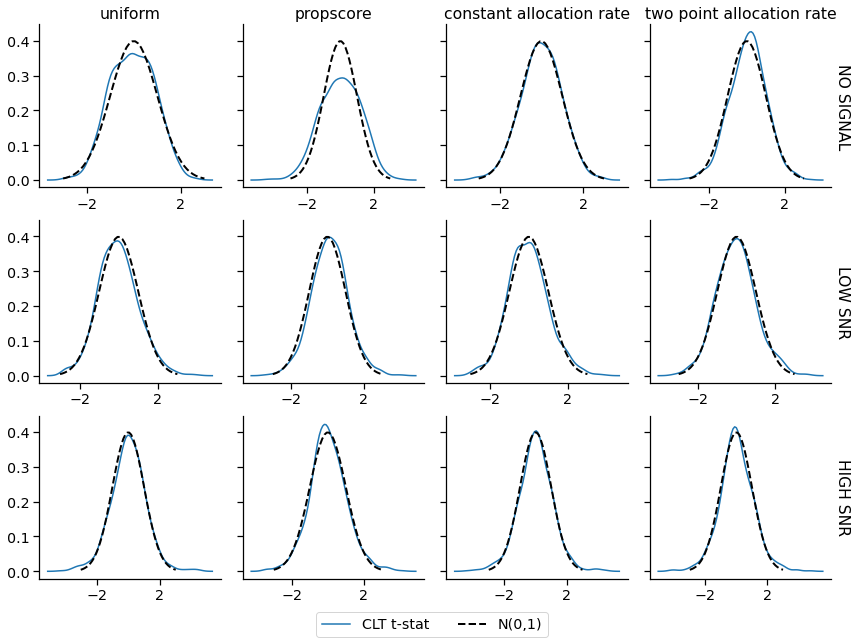

In [40]:
 plot_hist(df_contrasts.query("policy=='(0,2)'& T==20000"), noise_func='uniform', name='contrast_20000_hist')

## lambda(T-t)

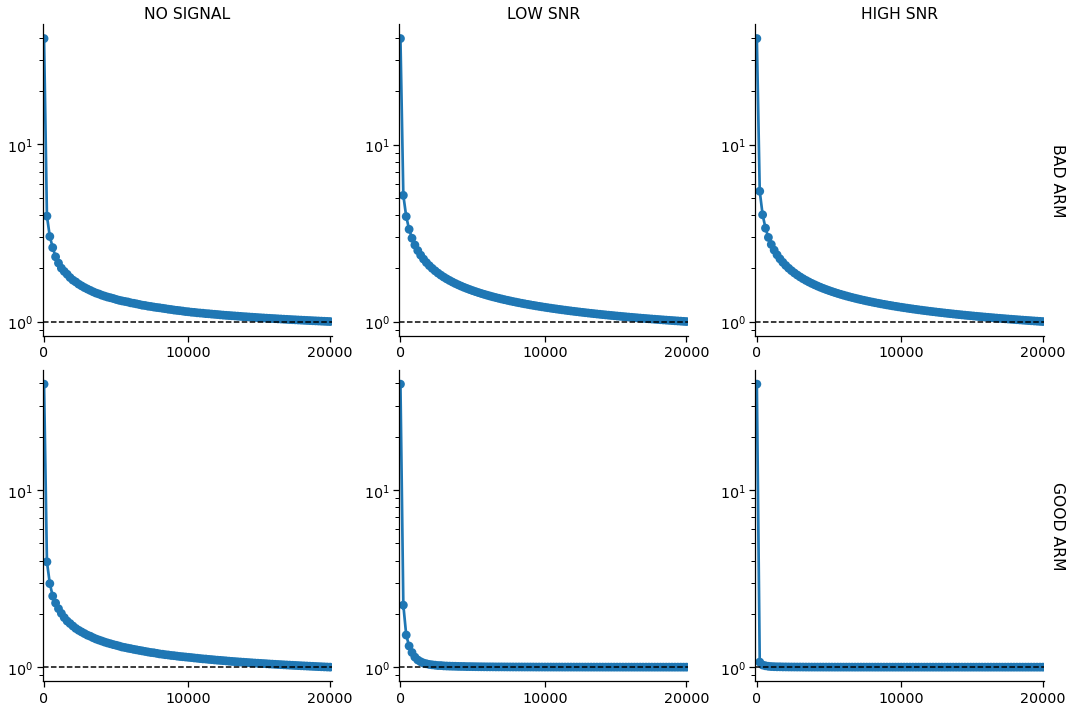

In [41]:
plot_lambda(df_sampleQuotas.query("T==20000 & method == 'two_point'"), noise_func='uniform')

## Compare contrasts

n


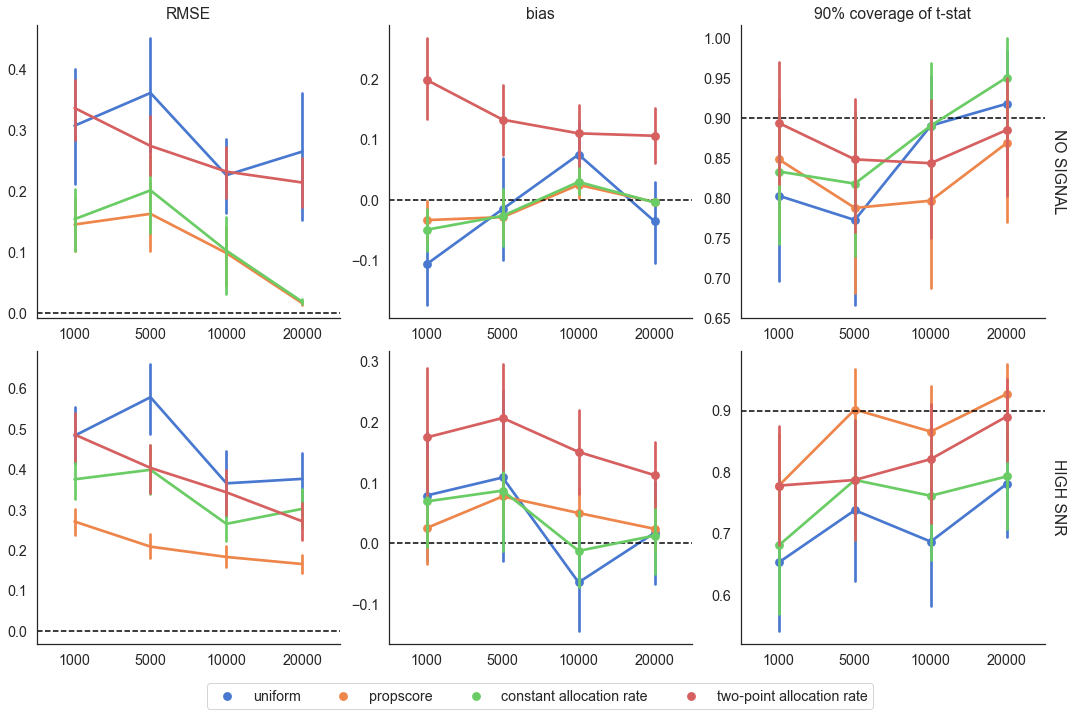

In [344]:
plot_contrast(df_contrasts.query("policy=='(0,2)'"), name="contrast")

## Compare with W-decorrelation

In [43]:
df_stats['compareW'] = np.array(df_stats['dgp']) + np.array(df_stats['policy']).astype(str)

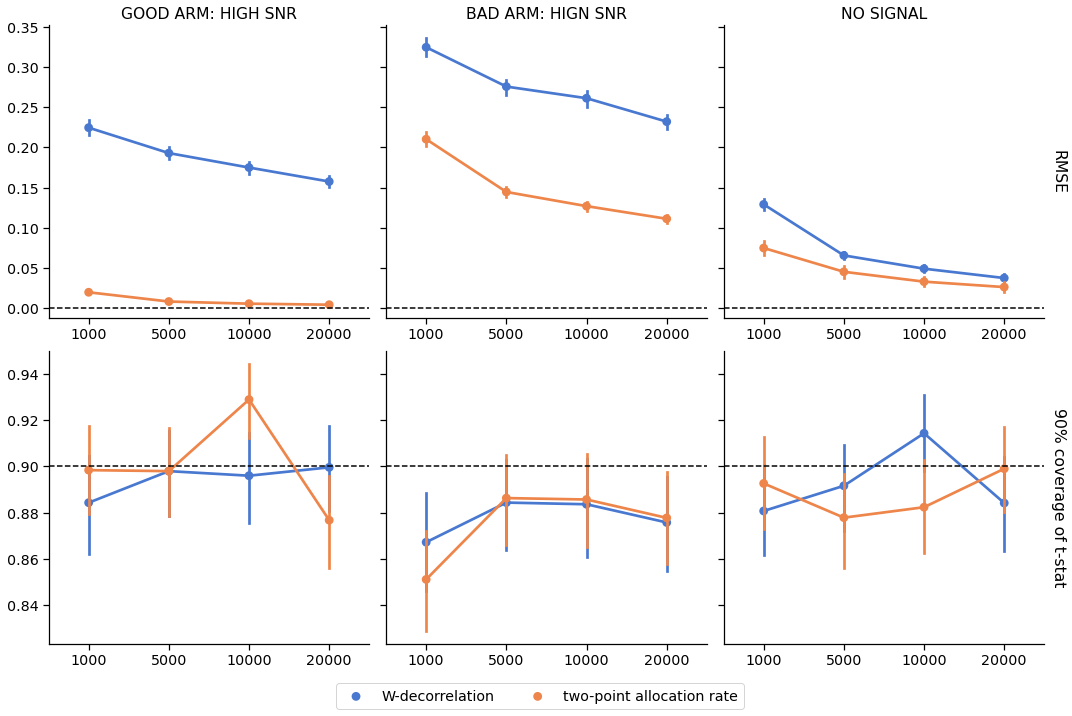

In [44]:
compare_with_W(df_stats, noise_func='uniform')

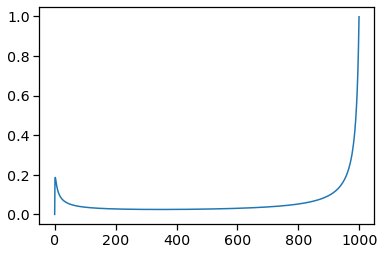

In [96]:
T = 1000
t = np.arange(1, T+1)
a = .9
plt.plot((1 - t**-a)/(1 + T*(t/T)**a - t))

In [109]:
T = 100000
t = np.arange(1, T+1)
a = 1/2

bad = 1 + T*(t/T)**a - t
good = 1 + T - t

e = t**-a

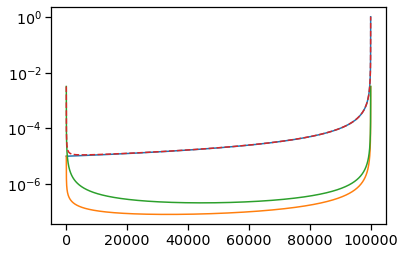

In [112]:
plt.plot(1/good)
plt.plot(t**-a/good)
plt.plot(t**-a/bad)
plt.plot(1/good - t**-a/good + t**-a/bad, linestyle="--")
plt.yscale("log")

In [116]:
np.any(1/good - t**-a/good + t**-a/bad < 1/good)

False

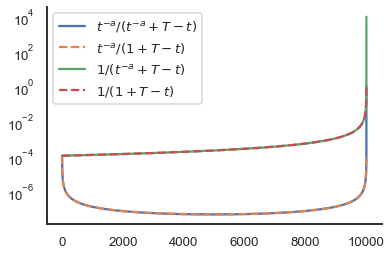

In [323]:
T = 10000
sns.set_context("talk", font_scale=0.8)
t = np.arange(1, T+1)
plt.plot(t**-a / (t**-a + T - t), label="$t^{-a}/(t^{-a} + T - t)$")
plt.plot(t**-a / (1 + T - t), label="$t^{-a}/(1 + T - t)$", linestyle="--")

plt.plot(1 / (t**-a + T - t), label="$1/(t^{-a} + T - t)$")
plt.plot(1 / (1 + T - t), label="$1/(1 + T - t)$", linestyle="--")
plt.yscale("log")
plt.legend()
sns.despine()

In [261]:
T = 100
t = np.arange(1, T+1)
a = 1/2
lambdas = 1/(1 + T*t**-a - t**(1-a))

terms = np.zeros_like(lambdas)
terms[0] = lambdas[0]
terms[1:] = lambdas[1:] * np.cumprod(1 - lambdas[:-1])
terms = np.clip(terms, 0, 1)

In [314]:
def f(lambdas, delta):
    terms = np.zeros_like(lambdas)
    terms[0] = lambdas[0]
    # terms[1:] = lambdas[1:] * np.cumprod(1 - lambdas[:-1])
    terms[1:] = lambdas[1:] * np.exp(-np.cumsum(lambdas[:-1]))
    terms = np.clip(terms, 0, 1)
    return np.sum(terms**(1 + delta/2))

Ts = [100, 1000, 10000, 100_000, 1_000_000, 10_000_000] #, 100_000_000]

print("Value of sum[t=1 to T] (lambda[t]*p[t-1])^(1 + delta/2)\n")
print("(random lambdas, lambda_good, lambda_bad)\n")
for T in Ts: 
    
    t = np.arange(1, T+1)
    a = .99
    delta = .1

    bad = t**-a / (t**-a + T - t)
    good = 1 / (t**-a + T**(1-a) - t**(1-a))

    lambdas_rnd = np.random.uniform(good, bad)

    res = f(lambdas_rnd, delta), f(good, delta), f(bad, delta)
    print(res)

Value of sum[t=1 to T] (lambda[t]*p[t-1])^(1 + delta/2)

(random lambdas, lambda_good, lambda_bad)

(1.4885969441037823, 1.8104556082811785, 0.9679620337670045)
(1.5927113397923773, 1.7804418883509987, 0.9932047466204373)
(1.5903252134757777, 1.7516714494257701, 0.9988867524153785)
(1.4483160851679824, 1.7240653147514164, 0.9998389702082899)
(1.613799009980263, 1.6975521830097253, 0.999931937150345)
(1.4055279345458564, 1.6720674179166881, 1.0000011783916498)
